# Chicago crimes

# 1. Clean the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from dateutil.parser import parse
import datetime as dt
import math

%matplotlib inline

In [2]:
cc_df = pd.read_csv('CrimesChicago.csv')

cc_df.head(10)

d:\ide\python_3_7\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ID Case Number                    Date                  Block  IUCR  \
0  11034701    JA366925  01/01/2001 11:00:00 AM        016XX E 86TH PL  1153   
1  11227287    JB147188  10/08/2017 03:00:00 AM     092XX S RACINE AVE  0281   
2  11227583    JB147595  03/28/2017 02:00:00 PM        026XX W 79TH ST  0620   
3  11227293    JB147230  09/09/2017 08:17:00 PM   060XX S EBERHART AVE  0810   
4  11227634    JB147599  08/26/2017 10:00:00 AM    001XX W RANDOLPH ST  0281   
5  11227517    JB138481  02/10/2013 12:00:00 AM  071XX S LAFAYETTE AVE  0266   
6  11227503    JB146383  01/01/2015 12:01:00 AM   061XX S KILBOURN AVE  1751   
7  11227508    JB146365  01/01/2017 12:01:00 AM     027XX S WHIPPLE ST  1754   
8  11022695    JA353568  07/17/2017 10:10:00 AM    021XX W MC LEAN AVE  0810   
9  11227633    JB147500  12/28/2017 03:55:00 PM   011XX S MICHIGAN AVE  1153   

                 Primary Type                          Description  \
0          DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
1         CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   
2                    BURGLARY                       UNLAWFUL ENTRY   
3                       THEFT                            OVER $500   
4         CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   
5         CRIM SEXUAL ASSAULT                            PREDATORY   
6  OFFENSE INVOLVING CHILDREN         CRIM SEX ABUSE BY FAM MEMBER   
7  OFFENSE INVOLVING CHILDREN       AGG SEX ASSLT OF CHILD FAM MBR   
8                       THEFT                            OVER $500   
9          DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   False     False  ...   8.0            45.0        11   
1            RESIDENCE   False     False  ...  21.0            73.0        02   
2                OTHER   False     False  ...  18.0            70.0        05   
3            RESIDENCE   False     False  ...  20.0            42.0        06   
4          HOTEL/MOTEL   False     False  ...  42.0            32.0        02   
5            RESIDENCE   False     False  ...   6.0            69.0        02   
6            RESIDENCE   False      True  ...  13.0            65.0        17   
7            RESIDENCE   False     False  ...  12.0            30.0        02   
8            RESIDENCE   False     False  ...  32.0            22.0        06   
9                  NaN   False     False  ...   2.0            32.0        11   

   X Coordinate Y Coordinate  Year              Updated On  Latitude  \
0           NaN          NaN  2001  08/05/2017 03:50:08 PM       NaN   
1           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
2           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
3           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
4           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
5           NaN          NaN  2013  02/11/2018 03:57:41 PM       NaN   
6           NaN          NaN  2015  04/12/2019 04:00:15 PM       NaN   
7           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
8           NaN          NaN  2017  07/24/2017 03:54:23 PM       NaN   
9           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   

  Longitude  Location  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  
5       NaN       NaN  
6       NaN       NaN  
7       NaN       NaN  
8       NaN       NaN  
9       NaN       NaN  

[10 rows x 22 columns]

Since there are lots of NaN type somewhere as we can see, check the num of that kind in each column

In [3]:
cc_df.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      6302
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614828
Community Area          613495
FBI Code                     0
X Coordinate             67941
Y Coordinate             67941
Year                         0
Updated On                   0
Latitude                 67941
Longitude                67941
Location                 67941
dtype: int64

In [4]:
cc_df.shape[0]

7079493

In the column "Ward", "Community Area", "X Coordinate", "Y Coordinate", "Latitude",and "Longitude", there are lots of missing values, and I don't think the "Location Description" attributes is not necessary for the visualization.

Moreover, there are some missing in case number attribute, and the unique ID is already assocated with each cases, so the case number is not necessary.

In [5]:
not_use_att = ['Case Number', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location', 'Updated On']
nan_removed_cc_df = cc_df.drop(not_use_att, axis=1)
nan_removed_cc_df = nan_removed_cc_df.fillna('Unknown')

In [6]:
nan_removed_cc_df.isna().sum()

ID                      0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
FBI Code                0
Year                    0
dtype: int64

In [7]:
nan_removed_cc_df.head(15)

ID                    Date                      Block  IUCR  \
0   11034701  01/01/2001 11:00:00 AM            016XX E 86TH PL  1153   
1   11227287  10/08/2017 03:00:00 AM         092XX S RACINE AVE  0281   
2   11227583  03/28/2017 02:00:00 PM            026XX W 79TH ST  0620   
3   11227293  09/09/2017 08:17:00 PM       060XX S EBERHART AVE  0810   
4   11227634  08/26/2017 10:00:00 AM        001XX W RANDOLPH ST  0281   
5   11227517  02/10/2013 12:00:00 AM      071XX S LAFAYETTE AVE  0266   
6   11227503  01/01/2015 12:01:00 AM       061XX S KILBOURN AVE  1751   
7   11227508  01/01/2017 12:01:00 AM         027XX S WHIPPLE ST  1754   
8   11022695  07/17/2017 10:10:00 AM        021XX W MC LEAN AVE  0810   
9   11227633  12/28/2017 03:55:00 PM       011XX S MICHIGAN AVE  1153   
10  11227586  02/10/2017 12:00:00 PM  089XX S COTTAGE GROVE AVE  1310   
11  11227475  11/22/2017 02:42:00 AM     056XX N CHRISTIANA AVE  2826   
12  11227247  01/01/2012 09:00:00 AM   105XX S INDIANAPOLIS AVE  1153   
13  11036284  07/29/2017 03:40:00 PM          014XX W Devon Ave  0820   
14  11227509  01/22/2017 12:01:00 AM       079XX S JEFFERY BLVD  1752   

                  Primary Type                          Description  \
0           DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
1          CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   
2                     BURGLARY                       UNLAWFUL ENTRY   
3                        THEFT                            OVER $500   
4          CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   
5          CRIM SEXUAL ASSAULT                            PREDATORY   
6   OFFENSE INVOLVING CHILDREN         CRIM SEX ABUSE BY FAM MEMBER   
7   OFFENSE INVOLVING CHILDREN       AGG SEX ASSLT OF CHILD FAM MBR   
8                        THEFT                            OVER $500   
9           DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
10             CRIMINAL DAMAGE                          TO PROPERTY   
11               OTHER OFFENSE       HARASSMENT BY ELECTRONIC MEANS   
12          DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
13                       THEFT                       $500 AND UNDER   
14  OFFENSE INVOLVING CHILDREN        AGG CRIM SEX ABUSE FAM MEMBER   

   Location Description  Arrest  Domestic  Beat District FBI Code  Year  
0             RESIDENCE   False     False   412        4       11  2001  
1             RESIDENCE   False     False  2222       22       02  2017  
2                 OTHER   False     False   835        8       05  2017  
3             RESIDENCE   False     False   313        3       06  2017  
4           HOTEL/MOTEL   False     False   122        1       02  2017  
5             RESIDENCE   False     False   731        7       02  2013  
6             RESIDENCE   False      True   813        8       17  2015  
7             RESIDENCE   False     False  1033       10       02  2017  
8             RESIDENCE   False     False  1432       14       06  2017  
9               Unknown   False     False   123        1       11  2017  
10            APARTMENT   False     False   633        6       14  2017  
11            APARTMENT   False      True  1711       17       26  2017  
12            RESIDENCE   False     False   432        4       11  2012  
13             SIDEWALK   False     False  2432       24       06  2017  
14            APARTMENT   False     False   414        4       20  2017

# 2. Relationship between crime and date/time

In [8]:
# convert the Date column to the timestamp
nan_removed_cc_df['Date'] = pd.to_datetime(nan_removed_cc_df['Date'], format = '%m/%d/%Y %I:%M:%S %p')

# extract the month from timestamp
cc_df_2 = nan_removed_cc_df[['Primary Type', 'Date']].copy()
cc_df_2.loc[:, 'Date'] = cc_df_2['Date'].dt.month

cc_dict_2 = dict(cc_df_2)

c_crime_2 = list(sorted(set(cc_dict_2['Primary Type'])))

cc_df_2 = cc_df_2.sort_values(['Primary Type'], axis = 0, ascending = True)

# change value in Date to seasons instead of month
cc_df_2['Date'] = cc_df_2['Date'].astype(int)
cc_df_2['Date'] = cc_df_2['Date'].map(lambda x: 'Sp' if x in [3, 4, 5] else x)
cc_df_2['Date'] = cc_df_2['Date'].map(lambda x: 'Su' if x in [6, 7, 8] else x)
cc_df_2['Date'] = cc_df_2['Date'].map(lambda x: 'Au' if x in [9, 10, 11] else x)
cc_df_2['Date'] = cc_df_2['Date'].map(lambda x: 'Wi' if x in [1, 2, 12] else x)

# cuont the total amount of each seasons
cc_groups_2 = cc_df_2.groupby(['Primary Type', 'Date'])['Date'].count()
cc_groups_2 = cc_groups_2.unstack().fillna(0)
cc_groups_2 = dict(cc_groups_2.stack())
cc_groups_2

{('ARSON', 'Au'): 2860.0,
 ('ARSON', 'Sp'): 3058.0,
 ('ARSON', 'Su'): 3310.0,
 ('ARSON', 'Wi'): 2411.0,
 ('ASSAULT', 'Au'): 109255.0,
 ('ASSAULT', 'Sp'): 118093.0,
 ('ASSAULT', 'Su'): 124460.0,
 ('ASSAULT', 'Wi'): 92464.0,
 ('BATTERY', 'Au'): 313217.0,
 ('BATTERY', 'Sp'): 341747.0,
 ('BATTERY', 'Su'): 366399.0,
 ('BATTERY', 'Wi'): 272824.0,
 ('BURGLARY', 'Au'): 108914.0,
 ('BURGLARY', 'Sp'): 92063.0,
 ('BURGLARY', 'Su'): 109556.0,
 ('BURGLARY', 'Wi'): 89896.0,
 ('CONCEALED CARRY LICENSE VIOLATION', 'Au'): 152.0,
 ('CONCEALED CARRY LICENSE VIOLATION', 'Sp'): 128.0,
 ('CONCEALED CARRY LICENSE VIOLATION', 'Su'): 148.0,
 ('CONCEALED CARRY LICENSE VIOLATION', 'Wi'): 118.0,
 ('CRIM SEXUAL ASSAULT', 'Au'): 7266.0,
 ('CRIM SEXUAL ASSAULT', 'Sp'): 7033.0,
 ('CRIM SEXUAL ASSAULT', 'Su'): 8271.0,
 ('CRIM SEXUAL ASSAULT', 'Wi'): 6867.0,
 ('CRIMINAL DAMAGE', 'Au'): 206328.0,
 ('CRIMINAL DAMAGE', 'Sp'): 208157.0,
 ('CRIMINAL DAMAGE', 'Su'): 221964.0,
 ('CRIMINAL DAMAGE', 'Wi'): 168372.0,
 ('CRIMINAL

In [9]:
graph_dict = {}
seasons = ['Sp', 'Su', 'Au', 'Wi']
for ind in range(len(c_crime_2)):
    graph_dict[c_crime_2[ind]] = []
    for s in seasons:
        graph_dict[c_crime_2[ind]].append(cc_groups_2[(c_crime_2[ind], s)])
graph_dict

{'ARSON': [3058.0, 3310.0, 2860.0, 2411.0],
 'ASSAULT': [118093.0, 124460.0, 109255.0, 92464.0],
 'BATTERY': [341747.0, 366399.0, 313217.0, 272824.0],
 'BURGLARY': [92063.0, 109556.0, 108914.0, 89896.0],
 'CONCEALED CARRY LICENSE VIOLATION': [128.0, 148.0, 152.0, 118.0],
 'CRIM SEXUAL ASSAULT': [7033.0, 8271.0, 7266.0, 6867.0],
 'CRIMINAL DAMAGE': [208157.0, 221964.0, 206328.0, 168372.0],
 'CRIMINAL TRESPASS': [52015.0, 51139.0, 49969.0, 48916.0],
 'DECEPTIVE PRACTICE': [71759.0, 73416.0, 71044.0, 71949.0],
 'DOMESTIC VIOLENCE': [0.0, 0.0, 0.0, 1.0],
 'GAMBLING': [3606.0, 6037.0, 3832.0, 1096.0],
 'HOMICIDE': [2370.0, 3147.0, 2624.0, 1972.0],
 'HUMAN TRAFFICKING': [13.0, 17.0, 18.0, 16.0],
 'INTERFERENCE WITH PUBLIC OFFICER': [4261.0, 4982.0, 4217.0, 3605.0],
 'INTIMIDATION': [1077.0, 1095.0, 1065.0, 909.0],
 'KIDNAPPING': [1784.0, 1795.0, 1650.0, 1656.0],
 'LIQUOR LAW VIOLATION': [4049.0, 3973.0, 3392.0, 2932.0],
 'MOTOR VEHICLE THEFT': [78816.0, 85471.0, 82458.0, 79010.0],
 'NARCOTIC

In [10]:
plt.rcParams['figure.figsize'] = (80.0, 220.0)
plt.rcParams['font.size'] = 35
x_axis_2 = ['Spring', 'Summer', 'Autumn', 'Winter']
for i in range(1,len(c_crime_2) + 1):
    plt.subplot(10, 4, i)
    plt.title(c_crime_2[i - 1], pad = 25)
    plt.xlabel('Seasons')
    plt.ylabel('Amount')
    plt.bar(x_axis_2, graph_dict[c_crime_2[i - 1]])
plt.tight_layout()

As we can see, most of the crimes occur the most during summer, and occur less frequent during winter.

Some of them might on the contrary.

# 3. Relationship between crime and year

In [11]:
# group by the year and primary type, so to create a dataframe with only year and primary type
cc_groups_ori = nan_removed_cc_df.groupby(['Year', 'Primary Type'])
cc_groups = nan_removed_cc_df.groupby(['Year', 'Primary Type'])['Description'].count()    # Q: why is the [] after groupby() is necessary

In [32]:
# cc_groups

In [13]:
# extract the years and the types of crimes as x axis and y axis
c_years = []
c_crime = []
for fst, crime in cc_groups_ori:
    c_years.append(fst[0])
    c_crime.append(fst[1])
c_years = list(set(c_years))
c_crime = list(sorted(set(c_crime)))

print(c_years)
print(c_crime)

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', 'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION', 'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION']


In [34]:
# create a dictionary to use the type of crime as key, and the amount of crimes each year as value
cc_dict = {}
for crimes in c_crime:
    cc_dict[crimes] = []
    for years in c_years:
        if crimes in cc_groups[years]:
            cc_dict[crimes].append(cc_groups[years][crimes])
        else:
            cc_dict[crimes].append(0)
cc_dict

{'ARSON': [1010,
  1032,
  955,
  778,
  691,
  726,
  712,
  644,
  616,
  522,
  504,
  469,
  364,
  397,
  453,
  516,
  444,
  373,
  378,
  55],
 'ASSAULT': [31384,
  31521,
  29477,
  28850,
  27066,
  25945,
  26313,
  25447,
  22861,
  21537,
  20411,
  19899,
  17972,
  16903,
  17045,
  18741,
  19305,
  20402,
  20600,
  2593],
 'BATTERY': [93445,
  94151,
  88379,
  87136,
  83964,
  80666,
  79592,
  75923,
  68462,
  65403,
  60458,
  59136,
  54003,
  49449,
  48918,
  50292,
  49227,
  49810,
  49464,
  6309],
 'BURGLARY': [26011,
  25623,
  25156,
  24564,
  25503,
  24324,
  24858,
  26218,
  26767,
  26422,
  26620,
  22843,
  17895,
  14569,
  13183,
  14287,
  12998,
  11745,
  9623,
  1220],
 'CONCEALED CARRY LICENSE VIOLATION': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  15,
  34,
  36,
  69,
  149,
  217,
  26],
 'CRIM SEXUAL ASSAULT': [1804,
  1831,
  1600,
  1575,
  1553,
  1475,
  1552,
  1540,
  1435,
  1370,
  1489,
  1430,
  1320,
  

In [15]:
plt.rcParams['figure.figsize'] = (80.0, 220.0)
plt.rcParams['font.size'] = 35
for i in range(1,len(c_crime) + 1):
    plt.subplot(10, 4, i)
    plt.title(c_crime[i - 1], pad = 25)
    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.xticks(rotation = 90)
    plt.xticks(c_years)
    plt.plot(c_years, cc_dict[c_crime[i - 1]], color = 'r')

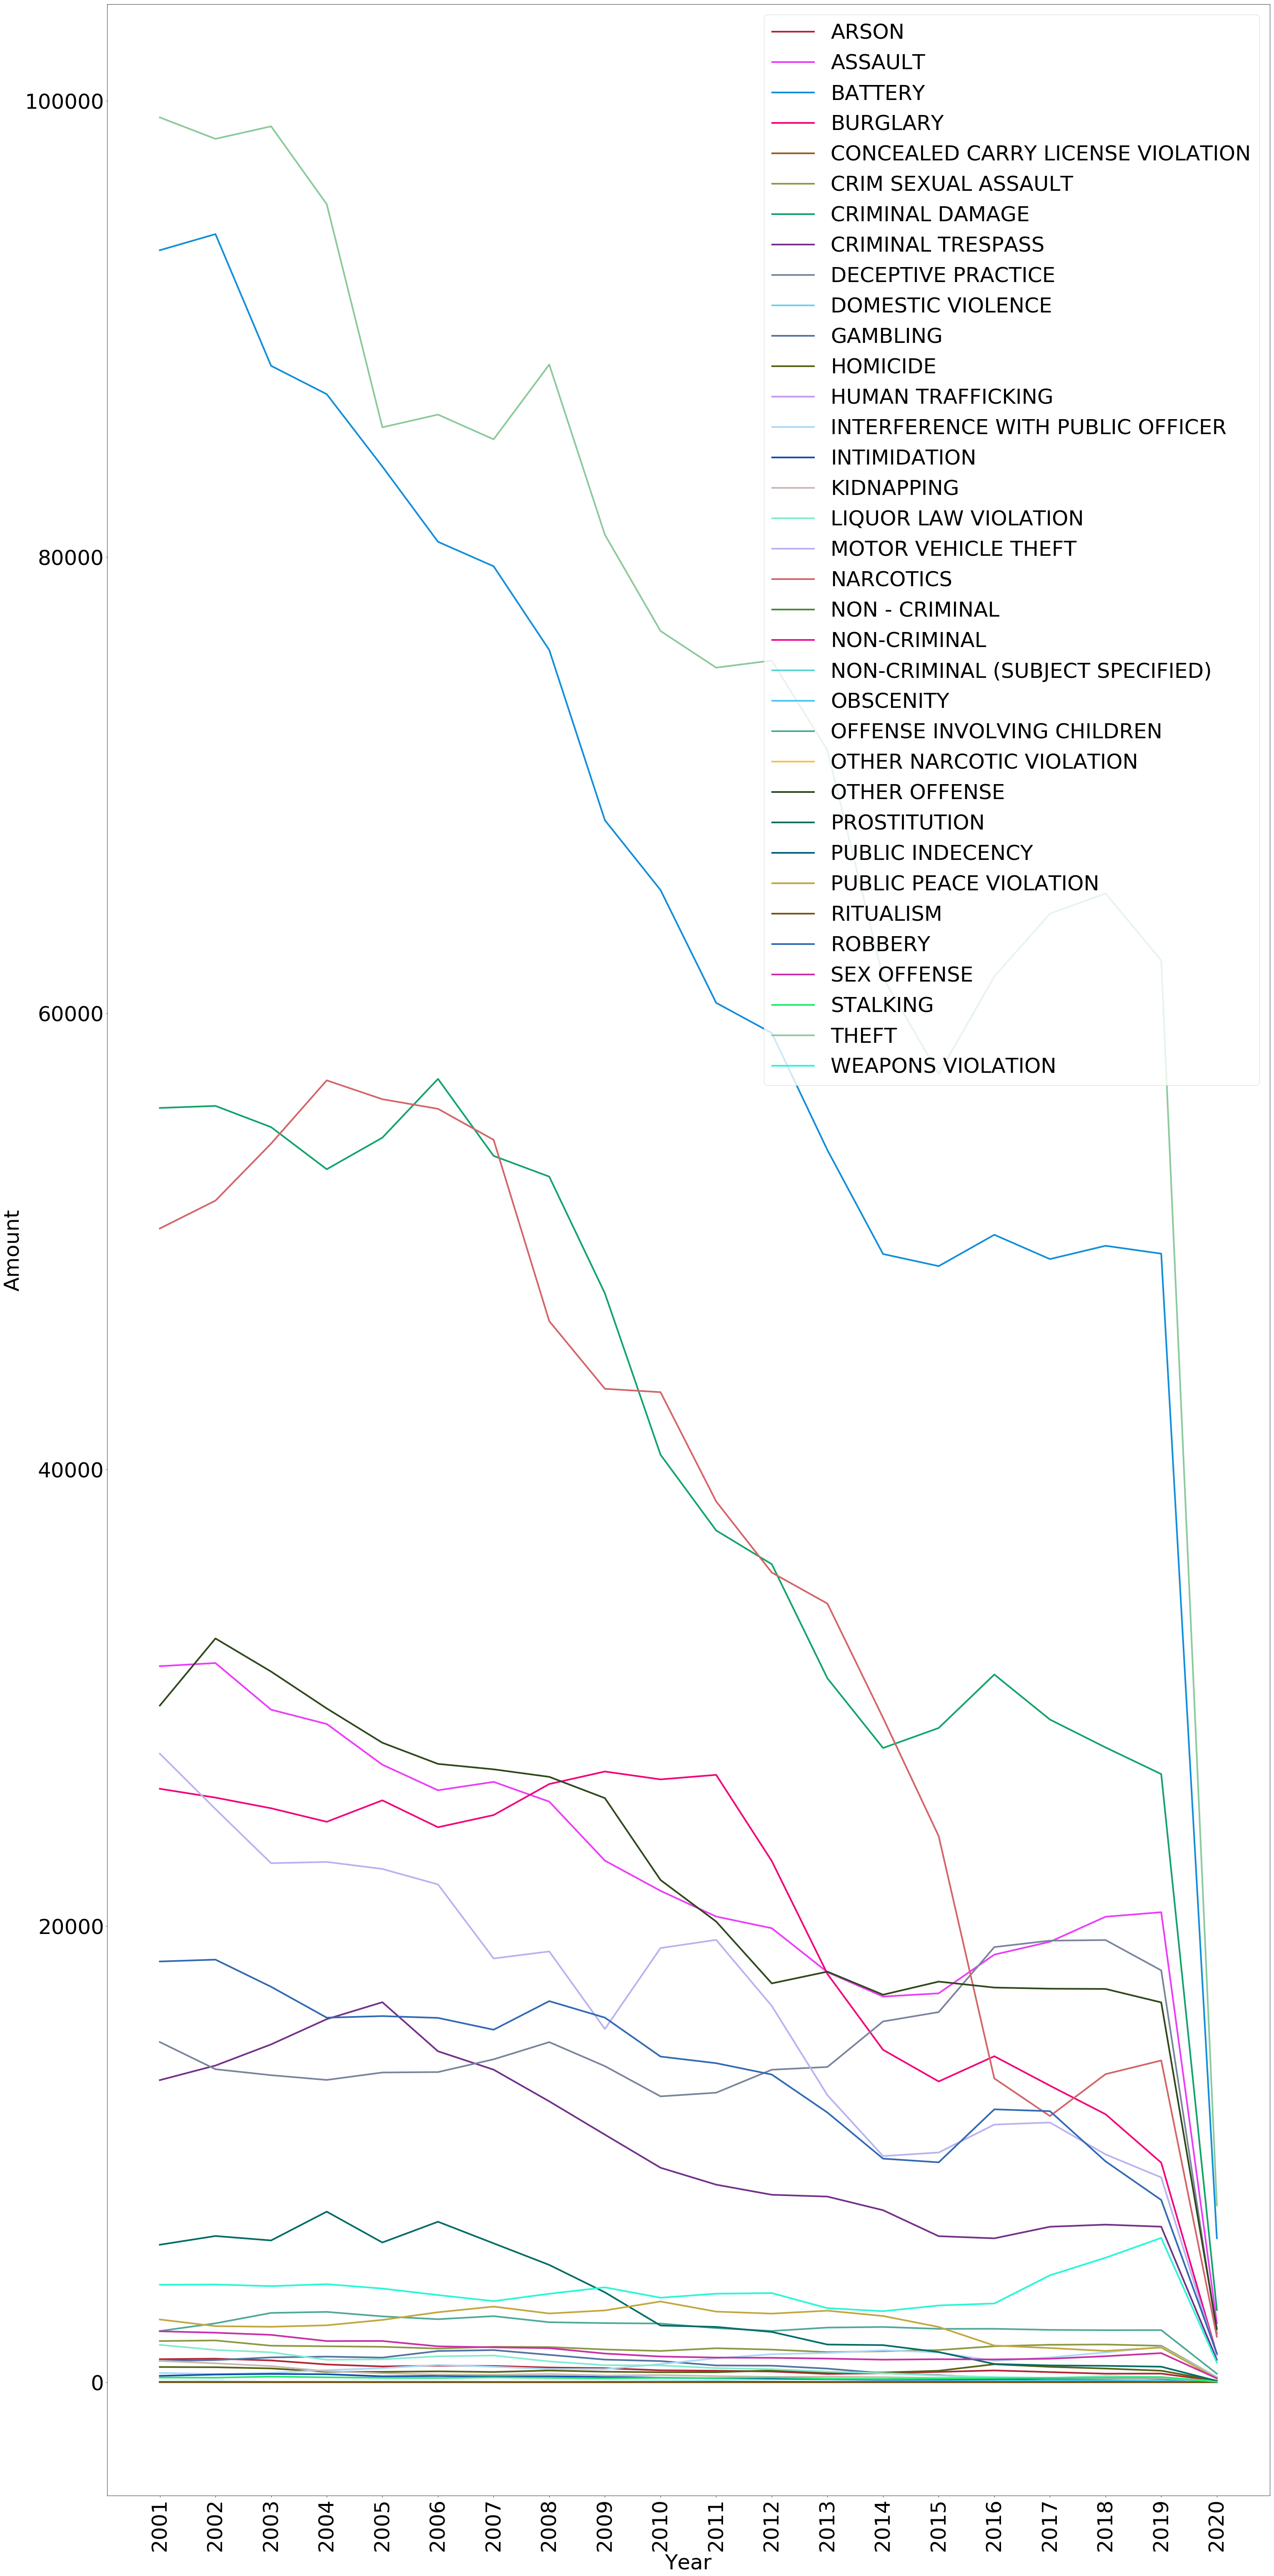

In [16]:
def randomcolor(used_color):
    r = random.random()
    g = random.random()
    b = random.random()
    if (r, g, b) in used_color:
        randomcolor(used_color)
    else:
        used_color.append((r, g, b))
        return (r, g, b)


plt.rcParams['figure.figsize'] = (50.0, 110.0)
plt.rcParams['font.size'] = 50
plt.xlabel('Year')
plt.ylabel('Amount')
plt.xticks(rotation = 90)
plt.xticks(c_years)
used_color = []
for i in range(1,len(c_crime) + 1):
    plt.plot(c_years, cc_dict[c_crime[i - 1]], color = randomcolor(used_color), label = c_crime[i - 1], lw = 4)
plt.legend()

report of 3

As we can find out from the graph above

The amounts of most of the crimes are in a decresing trend, but the difference is their slopes. and all of them have a sudden decending from 2019 to 2020.
The crime type which has the widest range.

# 4.  Relationship between the type of the crime and whether an arrest was made

In [17]:
# keep only the primary type and arrest column
cc_groups_4 = nan_removed_cc_df.groupby(['Primary Type', 'Arrest'])['Description'].count()
cc_groups_4.unstack().fillna(0)

Arrest                                 False     True 
Primary Type                                          
ARSON                                10134.0    1505.0
ASSAULT                             342808.0  101464.0
BATTERY                            1000252.0  293935.0
BURGLARY                            377457.0   22972.0
CONCEALED CARRY LICENSE VIOLATION       19.0     527.0
CRIM SEXUAL ASSAULT                  24911.0    4526.0
CRIMINAL DAMAGE                     748260.0   56561.0
CRIMINAL TRESPASS                    55579.0  146460.0
DECEPTIVE PRACTICE                  242880.0   45288.0
DOMESTIC VIOLENCE                        0.0       1.0
GAMBLING                               104.0   14467.0
HOMICIDE                              5335.0    4778.0
HUMAN TRAFFICKING                       58.0       6.0
INTERFERENCE WITH PUBLIC OFFICER      1327.0   15738.0
INTIMIDATION                          3440.0     706.0
KIDNAPPING                            6129.0     756.0
LIQUOR LAW VIOLATION                   125.0   14221.0
MOTOR VEHICLE THEFT                 296405.0   29350.0
NARCOTICS                             4216.0  725283.0
NON - CRIMINAL                          32.0       6.0
NON-CRIMINAL                           161.0      11.0
NON-CRIMINAL (SUBJECT SPECIFIED)         6.0       3.0
OBSCENITY                              123.0     534.0
OFFENSE INVOLVING CHILDREN           38503.0   10126.0
OTHER NARCOTIC VIOLATION                40.0      95.0
OTHER OFFENSE                       360615.0   79431.0
PROSTITUTION                           267.0   68885.0
PUBLIC INDECENCY                         1.0     176.0
PUBLIC PEACE VIOLATION               17684.0   31987.0
RITUALISM                               20.0       3.0
ROBBERY                             240460.0   25729.0
SEX OFFENSE                          18875.0    7983.0
STALKING                              3068.0     587.0
THEFT                              1320122.0  177402.0
WEAPONS VIOLATION                    17017.0   61558.0

In [18]:
# create a dictionary that the key is the type of a crime and the value is the amount of arrest and non-arrest made
c_arrest = [True, False]
cc_dict_4 = {}
for crimes in c_crime:
    cc_dict_4[crimes] = []
    for arrest in c_arrest:
        if crimes in cc_groups_4:
            if arrest in cc_groups_4[crimes]:
                cc_dict_4[crimes].append(cc_groups_4[crimes][arrest])
            else:
                cc_dict_4[crimes].append(0)
        else:
            cc_dict_4[crimes].append(0)
cc_dict_4

{'ARSON': [1505, 10134],
 'ASSAULT': [101464, 342808],
 'BATTERY': [293935, 1000252],
 'BURGLARY': [22972, 377457],
 'CONCEALED CARRY LICENSE VIOLATION': [527, 19],
 'CRIM SEXUAL ASSAULT': [4526, 24911],
 'CRIMINAL DAMAGE': [56561, 748260],
 'CRIMINAL TRESPASS': [146460, 55579],
 'DECEPTIVE PRACTICE': [45288, 242880],
 'DOMESTIC VIOLENCE': [1, 0],
 'GAMBLING': [14467, 104],
 'HOMICIDE': [4778, 5335],
 'HUMAN TRAFFICKING': [6, 58],
 'INTERFERENCE WITH PUBLIC OFFICER': [15738, 1327],
 'INTIMIDATION': [706, 3440],
 'KIDNAPPING': [756, 6129],
 'LIQUOR LAW VIOLATION': [14221, 125],
 'MOTOR VEHICLE THEFT': [29350, 296405],
 'NARCOTICS': [725283, 4216],
 'NON - CRIMINAL': [6, 32],
 'NON-CRIMINAL': [11, 161],
 'NON-CRIMINAL (SUBJECT SPECIFIED)': [3, 6],
 'OBSCENITY': [534, 123],
 'OFFENSE INVOLVING CHILDREN': [10126, 38503],
 'OTHER NARCOTIC VIOLATION': [95, 40],
 'OTHER OFFENSE': [79431, 360615],
 'PROSTITUTION': [68885, 267],
 'PUBLIC INDECENCY': [176, 1],
 'PUBLIC PEACE VIOLATION': [31987, 

In [19]:
plt.rcParams['figure.figsize'] = (80.0, 220.0)
plt.rcParams['font.size'] = 35
x_axis_4 = ['Arrested', 'Not Arrested']
for i in range(1,len(c_crime) + 1):
    plt.subplot(10, 4, i)
    plt.title(c_crime[i - 1], pad = 25)
    plt.xlabel('Arrest')
    plt.ylabel('Amount')
    plt.bar(x_axis_4, cc_dict_4[c_crime[i - 1]])
plt.tight_layout()

From the graph above, except 'Homicide', all other type of crimes have a huge difference between the amount of arrest and non-arrest.

The crimes like CONCEALED CARRY LICENSE VIOLATION, CRIMINAL TRESPASS, DOMESTIC VIOLENCE, GAMBLING, INTERFERENCE WITH PUBLIC OFFICER, LIQUOR LAW VIOLATION, NARCOTICS, OBSCENITY, OTHER NARCOTIC VIOLATION, PROSTITUTION, PUBLIC INDECENCY, PUBLIC PEACE VIOLATION, RITUALISM, WEAPONS VIOLATION are most likely to be arrested, and the others are most likely not to be arrested.

# 5.1 Locations with high crime-rate & trend

In [35]:
# coundt the number of crimes in each blocks
cc_groups_5_1 = nan_removed_cc_df.groupby(['Block'])['Description'].count()
cc_dict_5_1 = dict(cc_groups_5_1)

In [37]:
cc_list_5_1 = sorted( cc_dict_5_1.items(),key = lambda x:x[1],reverse = True)
cc_list_5_1 = pd.DataFrame(cc_list_5_1, columns = ['Block' , 'Crimes Amount'])
cc_list_5_1

Block  Crimes Amount
0                         100XX W OHARE ST          15631
1                         001XX N STATE ST          13672
2                       076XX S CICERO AVE           9602
3                     008XX N MICHIGAN AVE           8951
4                         0000X N STATE ST           8413
5      064XX S DR MARTIN LUTHER KING JR DR           5285
6                         023XX S STATE ST           5219
7      063XX S DR MARTIN LUTHER KING JR DR           5176
8                      0000X W TERMINAL ST           5164
9                          001XX W 87TH ST           4330
10                        008XX N STATE ST           4193
11                        022XX S STATE ST           3998
12                        0000X S STATE ST           3938
13                    006XX N MICHIGAN AVE           3898
14                      012XX S WABASH AVE           3880
15                     009XX W BELMONT AVE           3735
16                      057XX S CICERO AVE           3605
17                    038XX W ROOSEVELT RD           3530
18                         002XX W 87TH ST           3466
19                075XX S STONY ISLAND AVE           3444
20                      011XX W WILSON AVE           3438
21                    071XX S JEFFERY BLVD           3425
22                         0000X W 95TH ST           3387
23                       046XX W NORTH AVE           3366
24                    007XX N MICHIGAN AVE           3323
25                    005XX E BROWNING AVE           3304
26                    005XX N MICHIGAN AVE           3271
27                         040XX W LAKE ST           3229
28     065XX S DR MARTIN LUTHER KING JR DR           3167
29               085XX S COTTAGE GROVE AVE           3159
...                                    ...            ...
60766                132XX S CALUMET RIVER              1
60767    132XX S DR MARTN LUTHR KING JR DR              1
60768                 132XX S EBERHART AV.              1
60769                    132XX S Ellis Ave              1
60770                 132XX S GREEN BAY AV              1
60771              132XX S St Lawrence ave              1
60772                   133XX S DOTY AVE W              1
60773                    133XX S DREXEL AV              1
60774                   133XX S HOUSTON AV              1
60775                      133XX S KING DR              1
60776          134XX S BISHOP FORD EXPY IB              1
60777                   134XX S CALUMET AV              1
60778                      134XX S DOTY AV              1
60779                 134XX S DOTY AV WEST              1
60780                   134XX S DOTY AVE E              1
60781                   134XX S DOTY AVE W              1
60782  134XX S DR MARTIN LUTHER KING JR DR              1
60783                     134XX S ELLIS AV              1
60784                   135XX S DOTY AVE E              1
60785                   136XX S BRANDON AV              1
60786                136XX S CALUMET RIVER              1
60787                 136XX S DOTY AV EAST              1
60788                     136XX S HOXIE AV              1
60789                   137XX S DOTY AVE W              1
60790                   137XX S JEFFERY AV              1
60791                   138XX S DOTY AVE W              1
60792                     139XX S ATLANTIC              1
60793                      145XX S MINERVA              1
60794                        173XX  LORENZ              1
60795                175XX S SANDALWOOD DR              1

[60796 rows x 2 columns]

As we can see, the blocks of 100XX W OHARE ST and 001XX N STATE ST are the most dangerous blocks, and the amount of the crimes are decending repidly. Thus, we can say that there's a serious polarization on this.

# 5.2 Crime rate of locations change over year

In [22]:
cc_groups_5_2 = nan_removed_cc_df.groupby(['Block', 'Year'])['Description'].count()
cc_groups_5_2 = cc_groups_5_2.unstack().fillna(0)
cc_dict_5_2 = dict(cc_groups_5_2)
cc_groups_5_2

Year                   2001  2002  2003  2004  2005  2006  2007  2008  2009  \
Block                                                                         
0000X E 100 PL         30.0  14.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0000X E 100 ST         38.0   6.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0000X E 100TH PL        0.0  22.0  36.0  25.0  25.0  43.0  45.0  46.0  38.0   
0000X E 100TH ST        0.0  23.0  26.0  27.0  28.0  28.0  25.0  26.0  23.0   
0000X E 101 PL          7.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0000X E 101 ST         24.0   6.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0000X E 101ST PL        0.0  15.0  23.0  16.0  19.0  20.0  15.0  28.0  20.0   
0000X E 101ST ST        0.0  13.0  14.0  19.0  24.0  35.0  24.0  27.0  30.0   
0000X E 102 PL         14.0   5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0000X E 102 ST         12.0   4.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0000X E 102ND PL        0.0  25.0  25.0  25.0  46.0  52.0  30.0  30.0  41.0   
0000X E 102ND ST        0.0  19.0  10.0   9.0  19.0  15.0  18.0  33.0  26.0   
0000X E 103 PL          8.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0000X E 103 ST         25.0   4.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0000X E 103RD PL        0.0   9.0   9.0   9.0   7.0  12.0   9.0  19.0  16.0   
0000X E 103RD ST        0.0  11.0   8.0  11.0  59.0  46.0  32.0  39.0  42.0   
0000X E 104 ST         15.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0000X E 104TH ST        0.0   8.0  12.0  22.0  18.0  14.0  15.0  19.0  12.0   
0000X E 105 ST         16.0   7.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0000X E 105TH ST        0.0  14.0  16.0  24.0  13.0   7.0  12.0  12.0   8.0   
0000X E 107 ST          7.0   6.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0000X E 107TH ST        0.0  10.0  13.0  10.0  14.0  23.0  19.0  15.0  10.0   
0000X E 108 ST          9.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0000X E 108TH ST        0.0   5.0   8.0   8.0   8.0  11.0   7.0   7.0  10.0   
0000X E 109TH ST        0.0   3.0   0.0   2.0   1.0   4.0   1.0   7.0   3.0   
0000X E 11 ST           4.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0000X E 110 PL         17.0  12.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0000X E 110 ST         13.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0000X E 110TH PL        0.0  22.0  42.0  15.0  24.0  29.0  23.0  22.0  22.0   
0000X E 110TH ST        0.0   5.0   8.0   9.0  12.0   5.0   7.0   6.0   4.0   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
136XX S BUFFALO AVE     0.0   1.0   2.0   2.0   0.0   3.0   1.0   0.0   0.0   
136XX S CALHOUN AV      6.0   7.0  17.0   5.0   1.0   1.0   2.0   6.0   4.0   
136XX S CALHOUN AVE     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
136XX S CALUMET RIVER   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
136XX S DOTY AV EAST    1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
136XX S HOXIE AV        1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
136XX S HOXIE AVE       0.0   6.0   1.0   2.0   2.0   2.0   3.0   2.0   0.0   
136XX S INDIANA AV      9.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
136XX S INDIANA AVE     0.0   3.0   0.0   2.0   1.0   3.0   2.0   1.0   3.0   
136XX S TORRENCE AV     3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
136XX S TORRENCE AVE    0.0   1.0   6.0   6.0   6.0   1.0   0.0   1.0   1.0   
137XX S AVENUE O        4.0  10.0  10.0  15.0  20.0  14.0   5.0   4.0   8.0   
137XX S BRAINARD AV     8.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
137XX S BRAINARD AVE    0.0  17.0  22.0  27.0  20.0  22.0   8.0  12.0  16.0   
137XX S DOTY AVE W      0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
137XX S HOXIE AV        1.0   1.0   1.0   0.0   1.0   1.0   0.0   1.0   2.0   
137XX S HOXIE AVE       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
137XX S INDIANA AV      6.0   4.0   0.0   0.0   0.

In [38]:
# create a list to store the name of the blocks
c_block = []
for key in cc_dict_5_1:
    c_block.append(key)

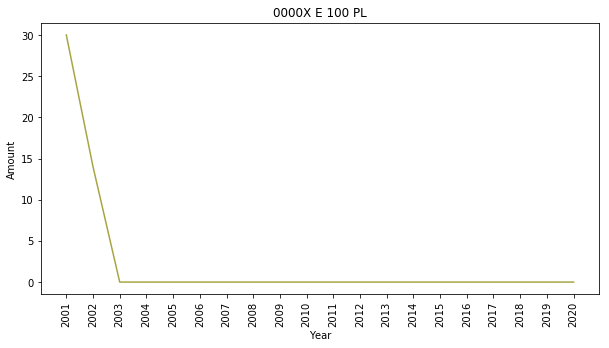

In [24]:
# write a function to get the amount of crimes of a block over 20 years
def graphOfBlocks(block):
    crime_num = []
    for ele in range(2001, 2021):
        crime_num.append(cc_dict_5_2[ele][block])
    plt.rcParams['figure.figsize'] = (10.0, 5.0)
    plt.rcParams['font.size'] = 10
    plt.title(block)
    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.xticks(rotation = 90)
    plt.xticks(c_years)
    plt.plot(c_years, crime_num, color = randomcolor([]), label = block)


# we can use the input() to get a graph of a block also.
# input_block = input('Choose a Block: ')
# graphOfBlocks(input_block)
graphOfBlocks(c_block[0])

It's hard to display all blocks' graph here, so I used an input to get a specific block's graph. For example, the crime rate of the block of 0000X E 100 PL keeps decending until 0.

# 6. Percentage of domestic crimes ended in an arrest

In [25]:
# keep only the domestic to determine if the crime is domestic, primary type, and arrest column
cc_groups_6 = nan_removed_cc_df.groupby(['Domestic', 'Primary Type', 'Arrest'])['Description'].count()
cc_groups_6 = cc_groups_6[True]
cc_dict_6_0 = dict(cc_groups_6)
cc_groups_6 = cc_groups_6.unstack().fillna(0)
cc_dict_6 = dict(cc_groups_6)
cc_groups_6
# cc_dict_6_0
# cc_dict_6

Arrest                               False     True 
Primary Type                                        
ARSON                                354.0     257.0
ASSAULT                            79517.0   18733.0
BATTERY                           428919.0  124775.0
BURGLARY                            2337.0     519.0
CRIM SEXUAL ASSAULT                 3163.0    1011.0
CRIMINAL DAMAGE                    54736.0    8689.0
CRIMINAL TRESPASS                   4114.0    2591.0
DECEPTIVE PRACTICE                  3087.0     167.0
DOMESTIC VIOLENCE                      0.0       1.0
GAMBLING                               0.0       4.0
HOMICIDE                              39.0     643.0
HUMAN TRAFFICKING                      6.0       0.0
INTERFERENCE WITH PUBLIC OFFICER      14.0      75.0
INTIMIDATION                         451.0      72.0
KIDNAPPING                          1657.0     214.0
LIQUOR LAW VIOLATION                   0.0       9.0
MOTOR VEHICLE THEFT                 1251.0     235.0
NARCOTICS                              7.0     261.0
NON-CRIMINAL                           0.0       1.0
NON-CRIMINAL (SUBJECT SPECIFIED)       6.0       1.0
OBSCENITY                             28.0      82.0
OFFENSE INVOLVING CHILDREN         19947.0    5478.0
OTHER OFFENSE                     112806.0   16501.0
PROSTITUTION                           0.0       9.0
PUBLIC INDECENCY                       0.0       1.0
PUBLIC PEACE VIOLATION              1794.0     465.0
RITUALISM                              4.0       1.0
ROBBERY                             3778.0     563.0
SEX OFFENSE                         1923.0     462.0
STALKING                            1302.0     247.0
THEFT                              34279.0    2429.0
WEAPONS VIOLATION                     47.0     219.0

In [39]:
# the crime types that need to be shown
c_crimes_dom = []
for key in cc_dict_6_0:
    c_crimes_dom.append(key[0])

c_crimes_dom = sorted(list(set(c_crimes_dom)))
c_crimes_dom

['ARSON',
 'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'DOMESTIC VIOLENCE',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'INTIMIDATION',
 'KIDNAPPING',
 'LIQUOR LAW VIOLATION',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'NON-CRIMINAL',
 'NON-CRIMINAL (SUBJECT SPECIFIED)',
 'OBSCENITY',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER OFFENSE',
 'PROSTITUTION',
 'PUBLIC INDECENCY',
 'PUBLIC PEACE VIOLATION',
 'RITUALISM',
 'ROBBERY',
 'SEX OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS VIOLATION']

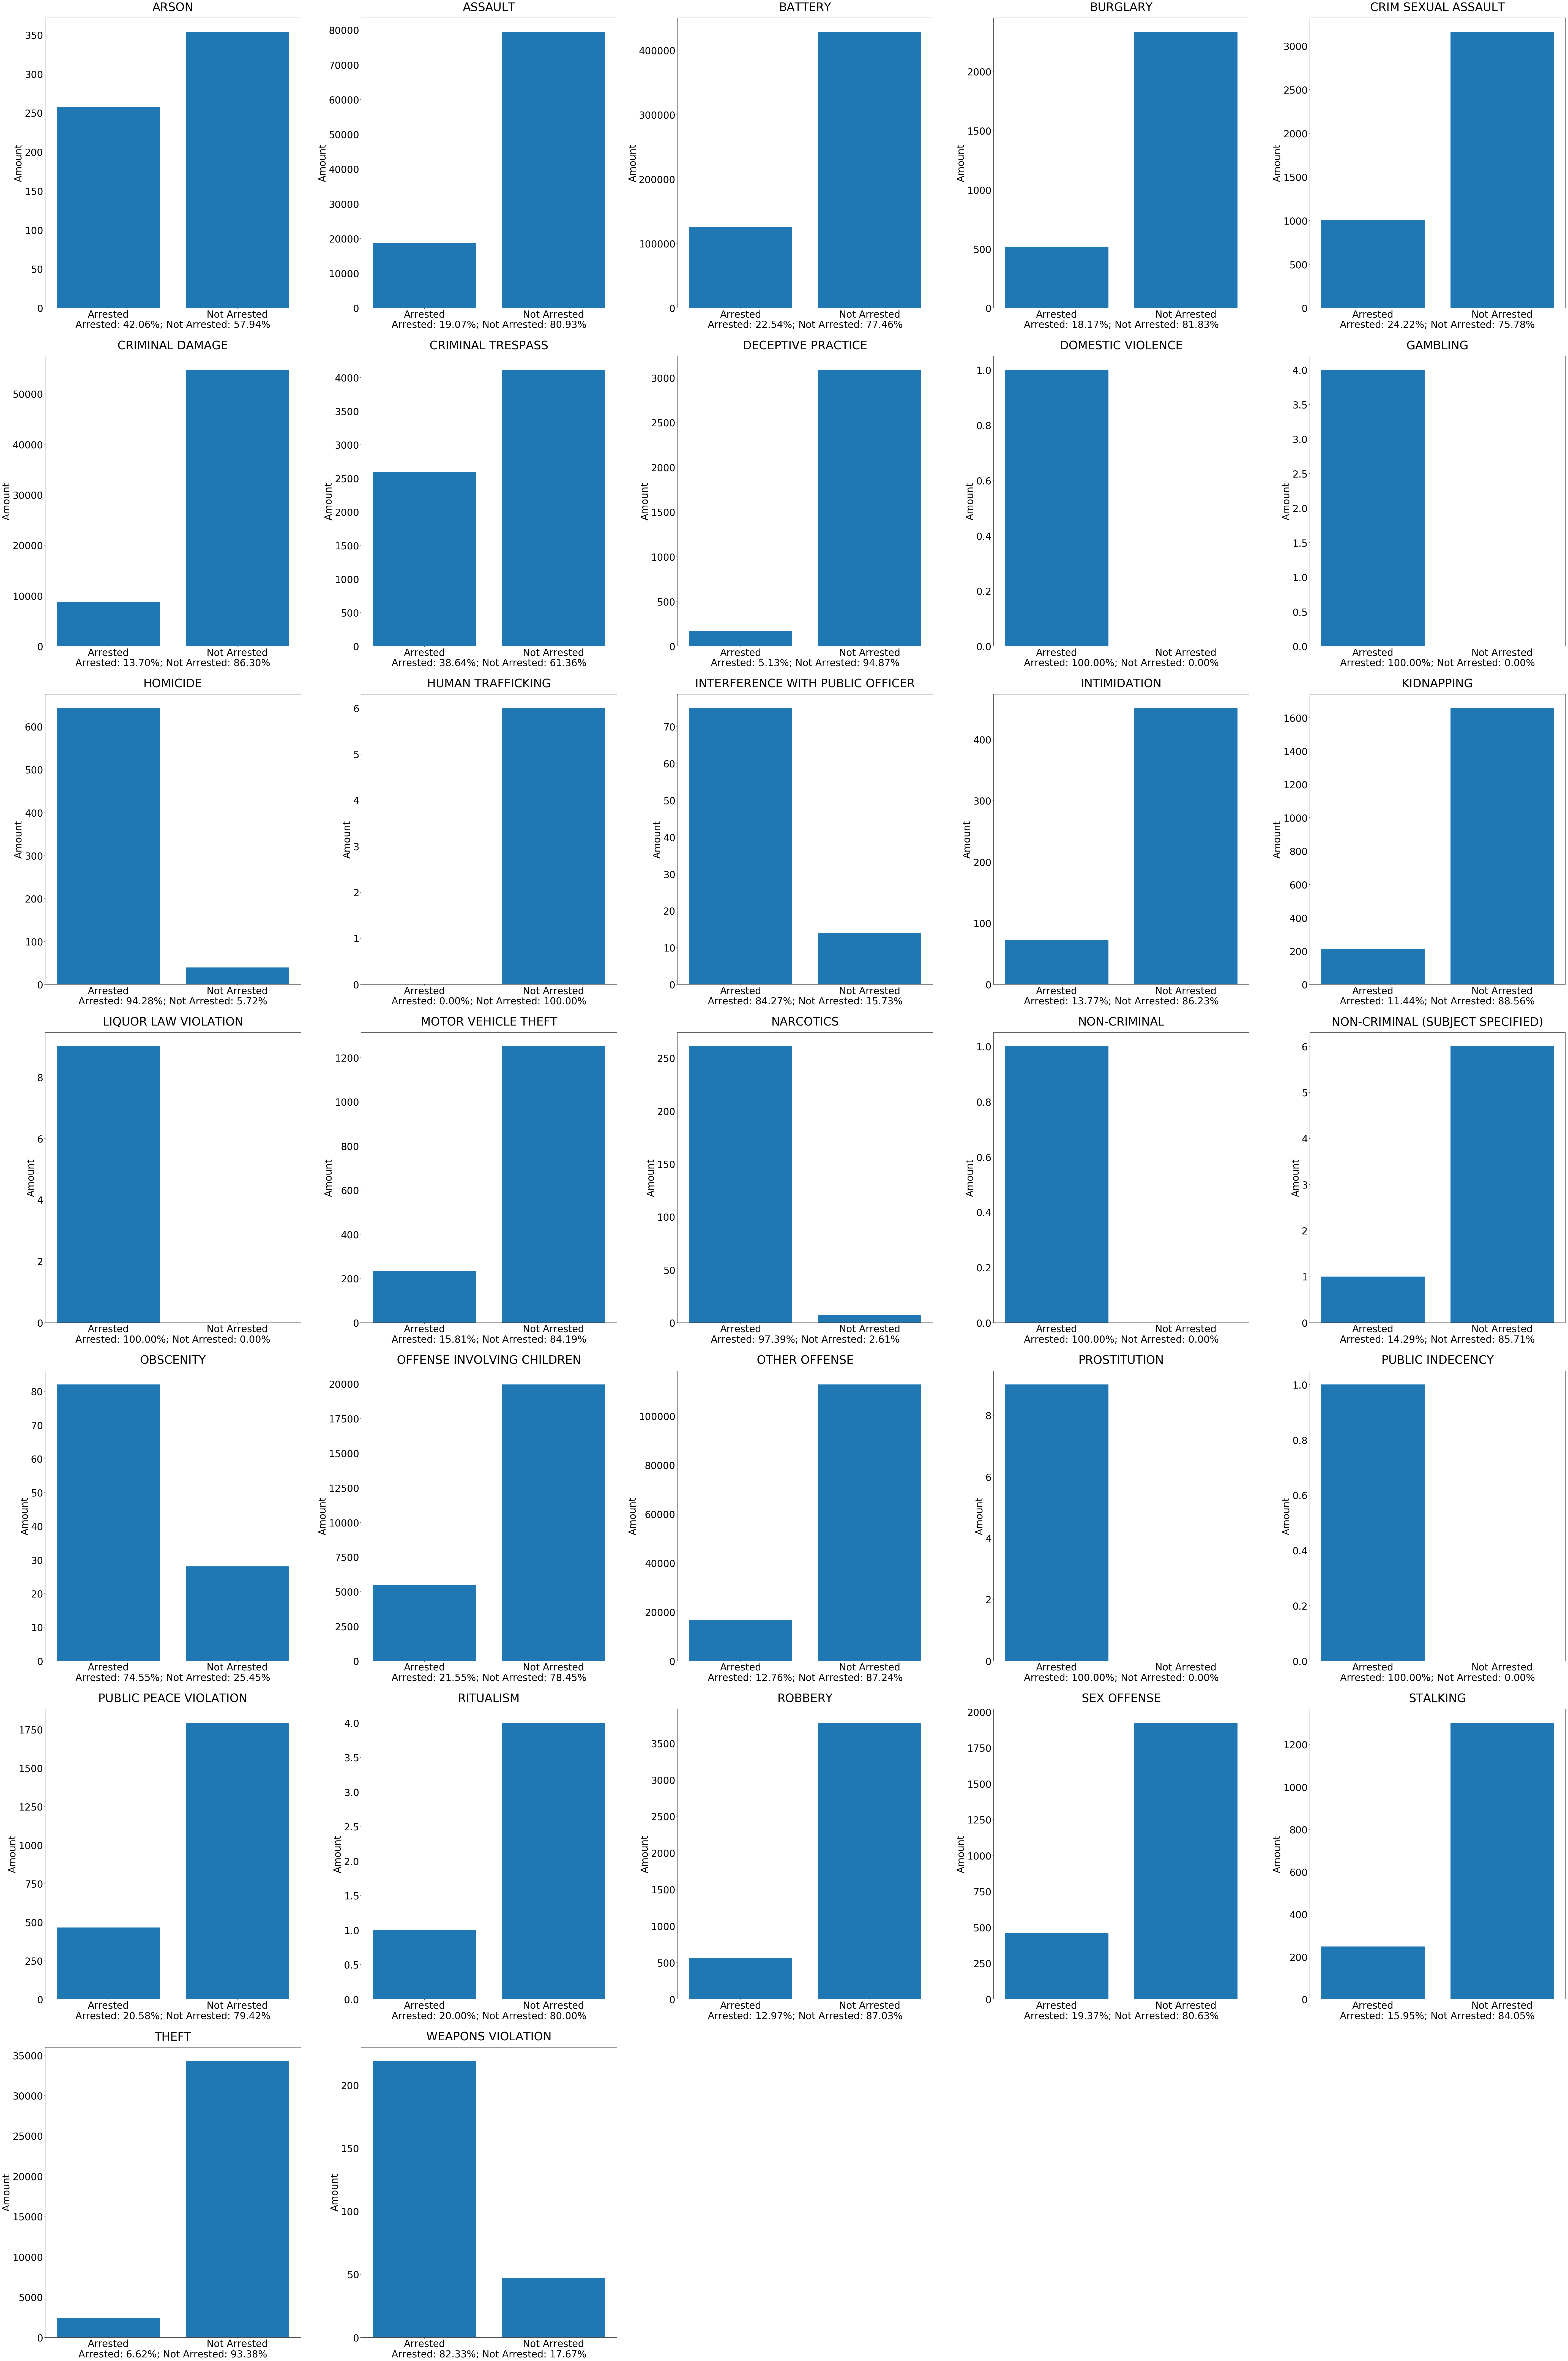

In [27]:
plt.rcParams['figure.figsize'] = (80.0, 120.0)
plt.rcParams['font.size'] = 35
for i in range(1,len(c_crimes_dom) + 1):
    arrested = cc_dict_6[True][c_crimes_dom[i - 1]]
    unarrested = cc_dict_6[False][c_crimes_dom[i - 1]]
    ttl = arrested + unarrested
    # print(arrested, unarrested, ttl)
    x_ax = 'Arrested: %.2f%%; Not Arrested: %.2f%%' % ((arrested/ttl * 100), (unarrested/ttl * 100))
    plt.subplot(7, 5, i)
    plt.title(c_crimes_dom[i - 1], pad = 25)
    plt.xlabel(x_ax)
    plt.ylabel('Amount')
    plt.bar(x_axis_4, [cc_dict_6[True][c_crimes_dom[i - 1]], cc_dict_6[False][c_crimes_dom[i - 1]]])
plt.tight_layout()

Many of them are about the same result to the overall result. However, CRIMINAL TRESPASS, HOMICIDE, PUBLIC PEACE VIOLATION are different from the overall result.

# 7.1 3 types of crimes and their primary descriptions

In [28]:
cc_groups_loc = nan_removed_cc_df.groupby(['Primary Type', 'Description'])['Description'].count()

c_crime_7_1 = c_crime[:3]

dict_7_1 = {}
for ele in c_crime_7_1:
    dict_7_1[ele] = [[], []]
    for key, value in dict(cc_groups_loc[ele]).items():
        dict_7_1[ele][0].append(key)
        dict_7_1[ele][1].append(value)
    
dict_7_1

{'ARSON': [['AGGRAVATED',
   'ATTEMPT ARSON',
   'BY EXPLOSIVE',
   'BY FIRE',
   'POS: CHEMICAL/DRY-ICE DEVICE',
   'POS: EXPLOSIVE/INCENDIARY DEV'],
  [1933, 1880, 101, 7602, 40, 83]],
 'ASSAULT': [['AGG PO HANDS NO/MIN INJURY',
   'AGG PRO.EMP: HANDGUN',
   'AGG PRO.EMP: OTHER DANG WEAPON',
   'AGG PRO.EMP: OTHER FIREARM',
   'AGG PRO.EMP:KNIFE/CUTTING INST',
   'AGGRAVATED PO: HANDGUN',
   'AGGRAVATED PO: OTHER DANG WEAP',
   'AGGRAVATED PO: OTHER FIREARM',
   'AGGRAVATED PO:KNIFE/CUT INSTR',
   'AGGRAVATED: HANDGUN',
   'AGGRAVATED: OTHER DANG WEAPON',
   'AGGRAVATED: OTHER FIREARM',
   'AGGRAVATED:KNIFE/CUTTING INSTR',
   'PRO EMP HANDS NO/MIN INJURY',
   'SIMPLE'],
  [6592,
   388,
   1152,
   89,
   558,
   1010,
   1267,
   83,
   570,
   49411,
   26327,
   2118,
   31738,
   15136,
   307833]],
 'BATTERY': [['AGG PO HANDS ETC SERIOUS INJ',
   'AGG PO HANDS NO/MIN INJURY',
   'AGG PRO EMP HANDS SERIOUS INJ',
   'AGG PRO.EMP: HANDGUN',
   'AGG PRO.EMP: OTHER DANG WEAPON',
   '

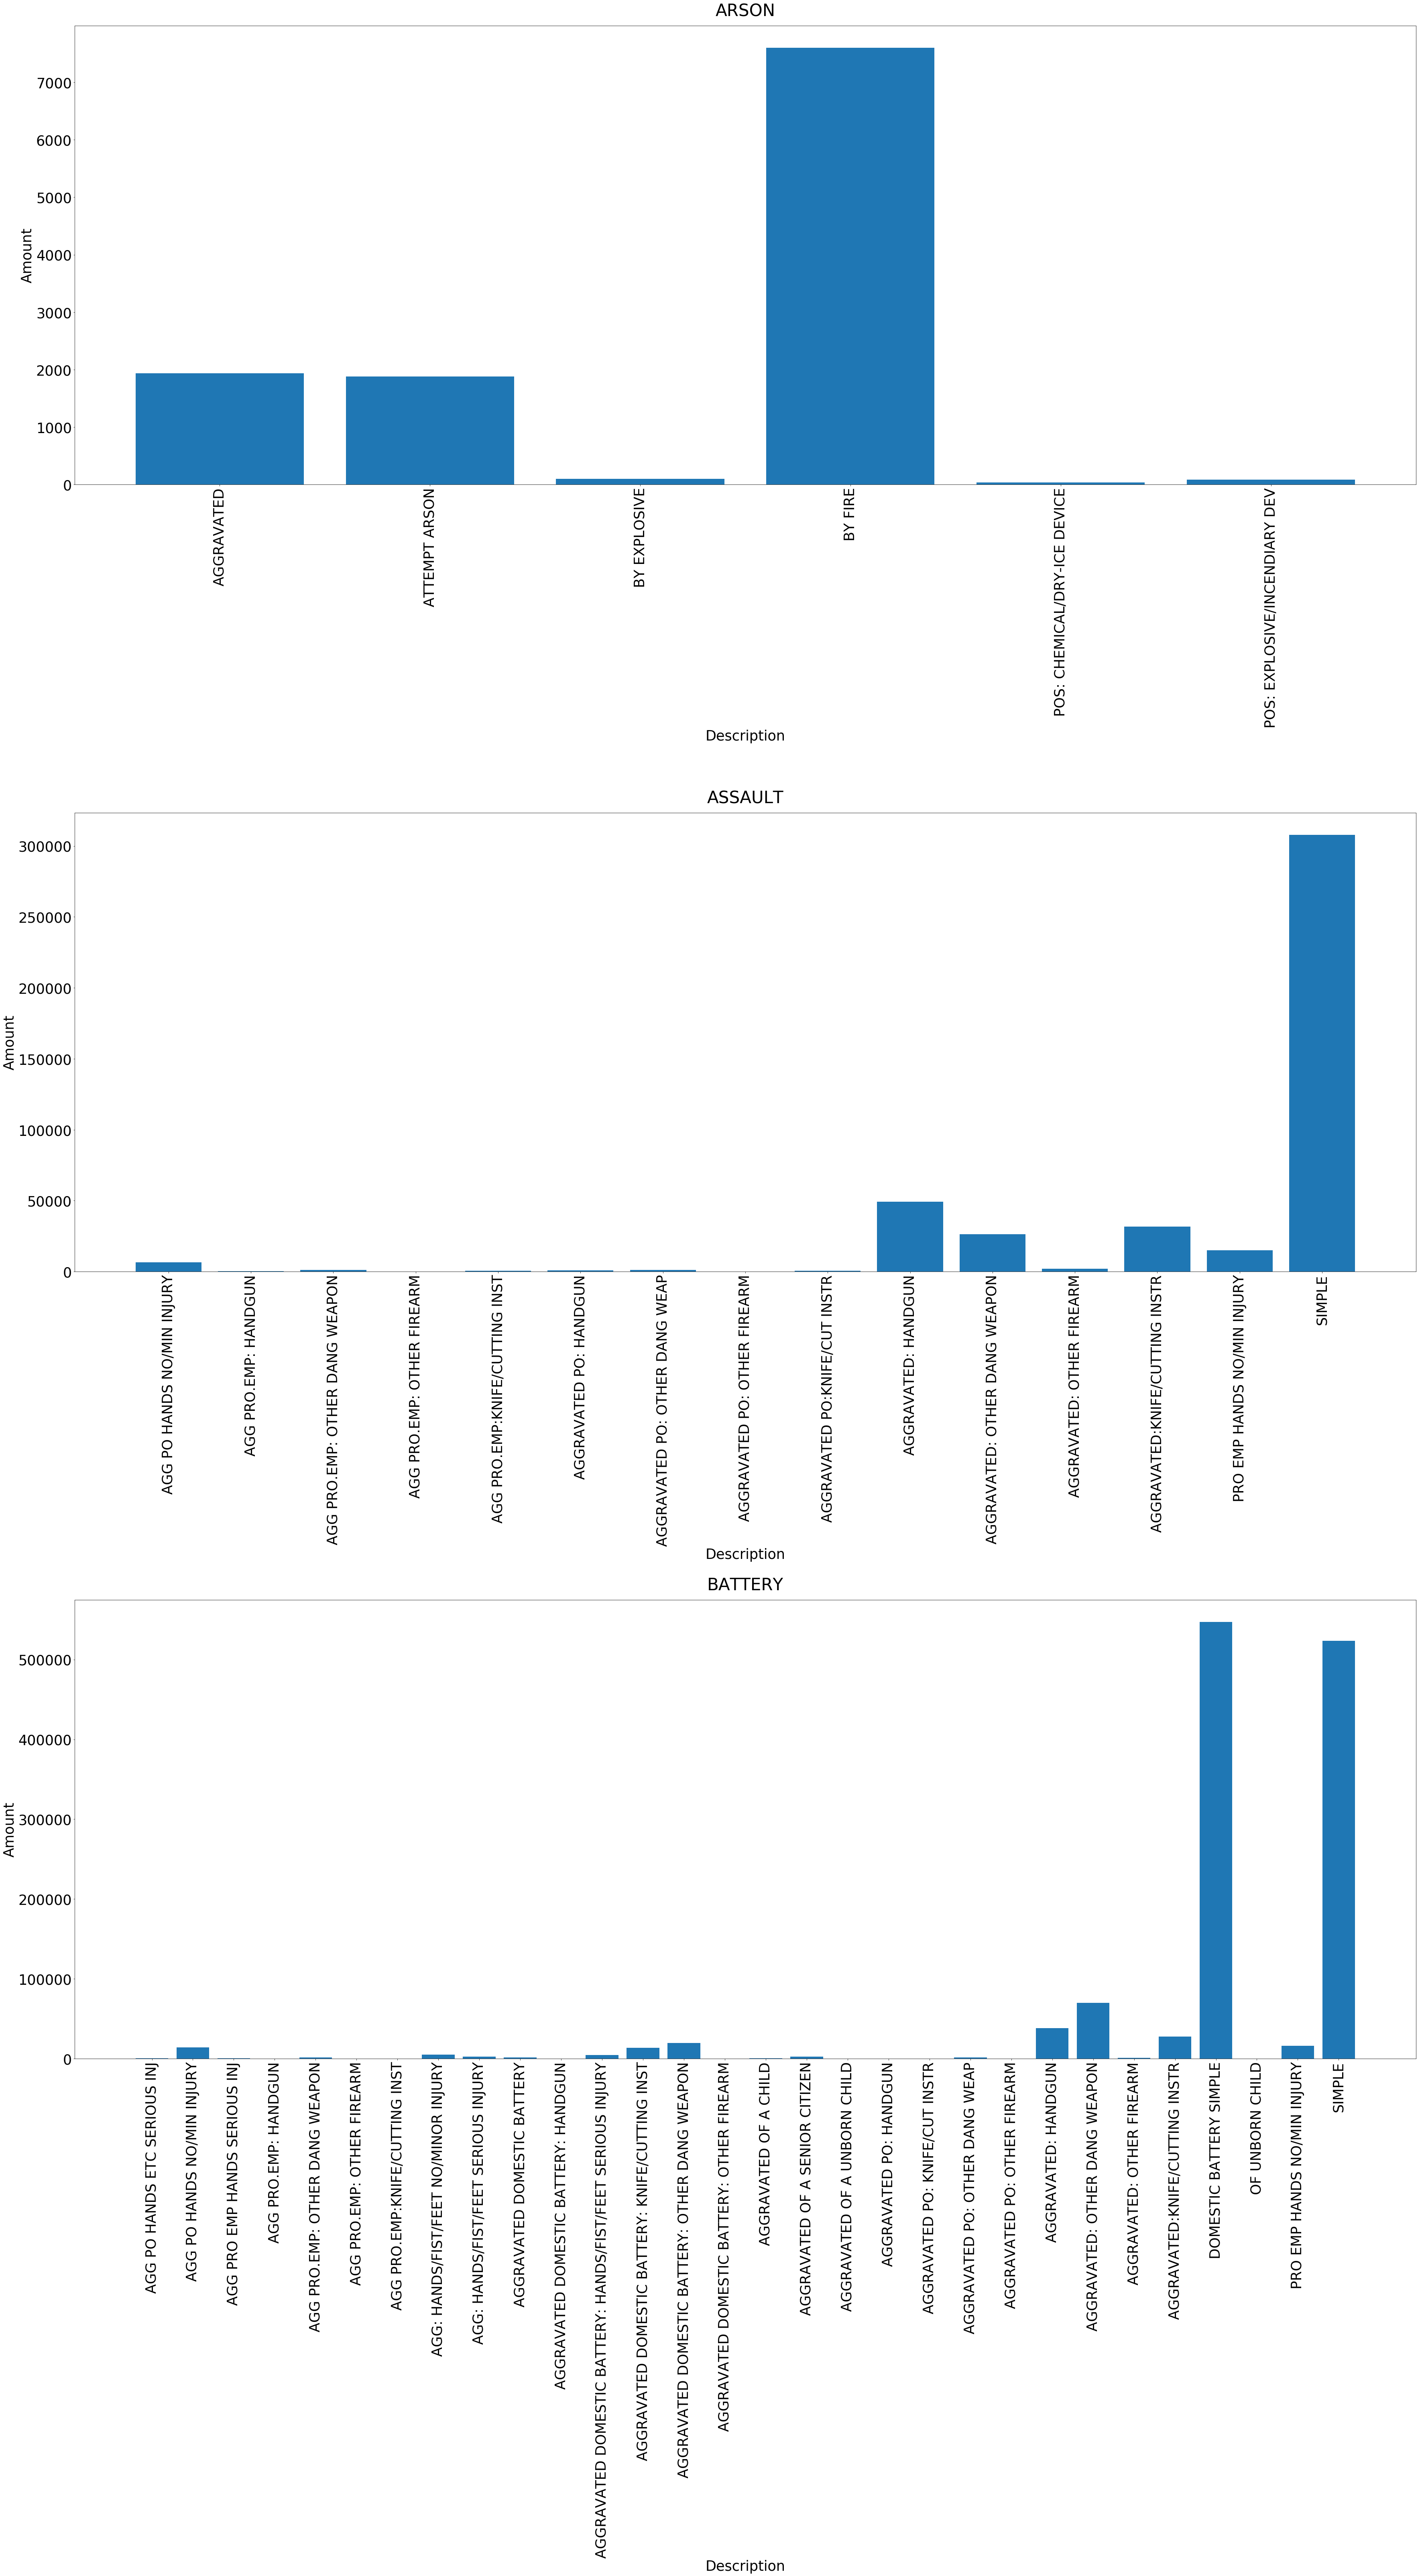

In [29]:
plt.rcParams['figure.figsize'] = (50.0, 90.0)
plt.rcParams['font.size'] = 35
for c in range(len(c_crime_7_1)):
    plt.subplot(3, 1, c + 1)
    plt.title(c_crime_7_1[c], pad = 25)
    plt.xticks(rotation = 90)
    plt.xlabel('Description')
    plt.ylabel('Amount')
    plt.bar(dict_7_1[c_crime_7_1[c]][0], dict_7_1[c_crime_7_1[c]][1])
plt.tight_layout()

The main part of ARSON is BY FIRE

The main part of ASSAULT is SIMPLE

The main part of BATTERY is SIMPLE and DOMESTIC BATTERY SIMPLE

# 7.2 Type of crime and location

For this part, I tried to find out the locations that the crimes occur the most frequently.

In [30]:
# only keep the column of Primary Type and Location, can count them
cc_df_7_2 = nan_removed_cc_df.groupby(['Primary Type', 'Location Description'])['Location Description'].count()
cc_df_7_2 = cc_df_7_2.unstack().fillna(0)

In [31]:
# to create a dictionary to store the location that the crime occurs most frequent, and the amount
dict_7_2 = {}

for ele in c_crime:
    # extract the row of a type of crime
    tmp = cc_df_7_2.loc[ele, :]
    index = tmp[tmp == tmp.max()].index
    index = np.random.choice(index) 
    dict_7_2[ele] = [index, tmp.max()]

dict_7_2

{'ARSON': ['VEHICLE NON-COMMERCIAL', 3606.0],
 'ASSAULT': ['STREET', 90797.0],
 'BATTERY': ['RESIDENCE', 271060.0],
 'BURGLARY': ['RESIDENCE', 136748.0],
 'CONCEALED CARRY LICENSE VIOLATION': ['STREET', 233.0],
 'CRIM SEXUAL ASSAULT': ['RESIDENCE', 9518.0],
 'CRIMINAL DAMAGE': ['STREET', 289424.0],
 'CRIMINAL TRESPASS': ['RESIDENCE', 25244.0],
 'DECEPTIVE PRACTICE': ['RESIDENCE', 80643.0],
 'DOMESTIC VIOLENCE': ['APARTMENT', 1.0],
 'GAMBLING': ['SIDEWALK', 8264.0],
 'HOMICIDE': ['STREET', 4974.0],
 'HUMAN TRAFFICKING': ['RESIDENCE', 23.0],
 'INTERFERENCE WITH PUBLIC OFFICER': ['STREET', 8249.0],
 'INTIMIDATION': ['RESIDENCE', 1190.0],
 'KIDNAPPING': ['STREET', 1997.0],
 'LIQUOR LAW VIOLATION': ['SIDEWALK', 3223.0],
 'MOTOR VEHICLE THEFT': ['STREET', 256425.0],
 'NARCOTICS': ['STREET', 258890.0],
 'NON - CRIMINAL': ['RESIDENCE', 14.0],
 'NON-CRIMINAL': ['RESIDENCE', 31.0],
 'NON-CRIMINAL (SUBJECT SPECIFIED)': ['APARTMENT', 3.0],
 'OBSCENITY': ['RESIDENCE', 299.0],
 'OFFENSE INVOLVING CH